### 1. Loading and Clean data

* Since categorical variables dominate in dataset and the number of weakly correlated numeric variables is not more than 4, we need to transform categorical variables to increase the model's ability to generalize data. (we can not drop them)

* Particular attention should be paid to the Duration Feature and categories that can be treated as binary. It suggests using binning and simple transformation accordingly (0 and 1)

* For categories of more than 3 types of possible option (job, marital and education) it is proposed to use the encode targeting - it will allow correctly relate the values to the target variable and use indicated categories in numerical form. One-hot encoding for 'marital', 'education' and 'job' is not suggested as they include many categories. It creates a really sparse matrix and inflate the number of dimensions

* In some cases, rescaling is proposed to normalize the data.
* Duration is excluded as it cause data leakage.
* For month and day of week if we use one-hot encoding or target encoding we loose some information related to cyclical continuity. there are two appraoches sine/cosine transformation and using radial basis functions. Here I use the first one. In sine/cosine transformation, we assign a two-axis coordinates to each day of week or month of year


In [1]:
# Import libraries 

# disable showing long warnings
import warnings
warnings.filterwarnings("ignore")

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# util functions
from utils import load_data, scale_data, prepare_grid_list, plot_results, plot_feature_importance

# save and load models
import pickle


In [2]:
'''Load and clean data, train/test split'''
data_path = '../data/term deposit data.csv'
random_state = 11
X_train, y_train, X_test, y_test = load_data(data_path, verbose=False, random_state=random_state)

In [3]:
# scaling the numerical features
X_train_scaled, X_test_scaled, X_train_balanced, y_balanced = scale_data(X_train, y_train, X_test)
# X_train_scaled.head()


<AxesSubplot: >

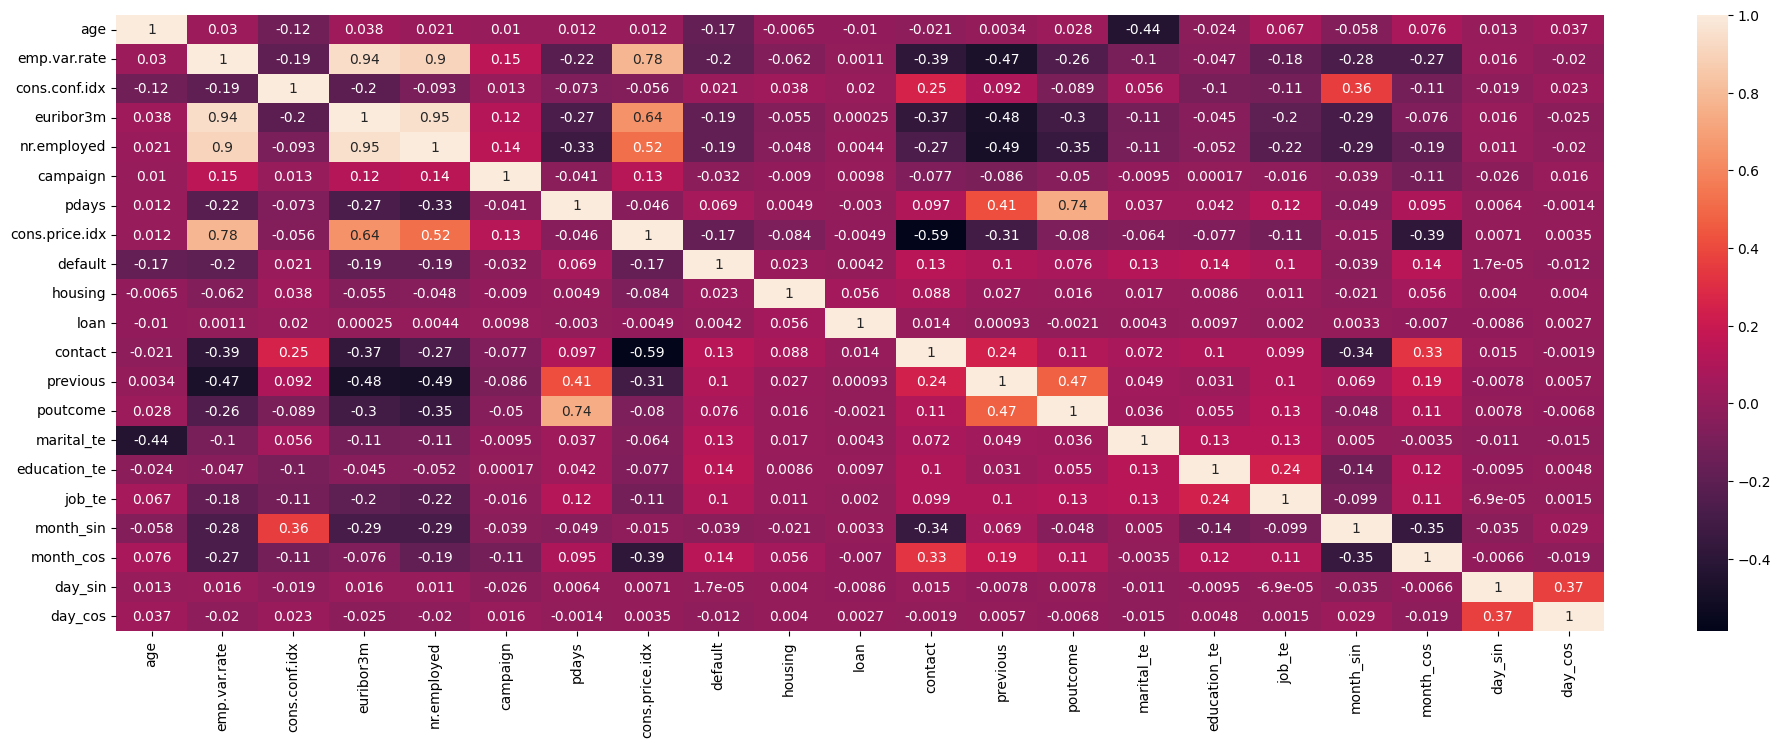

In [4]:
plt.rcParams["figure.figsize"] = (24, 8)
sns.heatmap(X_train_scaled.corr(),annot=True)
# plt.rcParams["figure.figsize"] = (24, 8)
# sns.heatmap(X_balanced.corr(),annot=True)


### 3. The choice of metrics result

It is proposed to use ROC_AUC metrics for evaluating different models with additional monitoring of the accuracy metric dynamic.

This approach will allow us to explore models from different angles. Also, in this context, false negatives seems to be more important, so recall is another metric to keep monitoring.

### 4. Building a pipline for Cross Validation and Grid Search procedures (search for optimal parameters of the model)

In [5]:
# set for LogisticRegression
grid_params_lr = [{
                'lr__penalty': ['l2'],
                'lr__C': [0.3],
                'lr__solver': ['sag']
                }]

# set for RandomForestClassifier
grid_params_rf = [{
                'rf__criterion': ['entropy'],
                'rf__min_samples_leaf': [80],
                'rf__max_depth': [25],
                'rf__min_samples_split': [3, 5],
                'rf__n_estimators' : [100]
                }]

# set for KNeighborsClassifier
grid_params_knn = [{'knn__n_neighbors': [15]}]

# set for XGBClassifier
grid_params_xgb = [{'xgb__max_depth': [8],                 # Maximum depth of a tree. Increasing this value will make the model more complex
                    'xgb__gamma': [10],                    # Minimum loss reduction required to make a further partition on a leaf node of the tree.
                    'xgb__scale_pos_weight': [1]           # Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances)
                }]

grid_list = prepare_grid_list(grid_params_lr, grid_params_rf, grid_params_knn, grid_params_xgb, scoring='accuracy')

In [7]:
'''iterate over models and obtain results'''
from utils import fit_model
print('=======Results using X_train without scaling/balancing=======')
print()
result_acc1, result_auc1, result_rec1, result_prc1, models1 = fit_model(grid_list, X_train, y_train, X_test, y_test)

=======Results using X_train without scaling/balancing=======


+++++++ Start New Model ++++++++++++++++++++++
Estimator is Logistic
---------------------------------------------
best params {'lr__C': 0.3, 'lr__penalty': 'l2', 'lr__solver': 'sag'}
best score is 0.769
---------------------------------------------
ROC_AUC: 0.782, recall: 0.668, precision: 0.276, accuracy: 0.769
It lasted for 96.864 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is RandomForest
---------------------------------------------
best params {'rf__criterion': 'entropy', 'rf__max_depth': 25, 'rf__min_samples_leaf': 80, 'rf__min_samples_split': 3, 'rf__n_estimators': 100}
best score is 0.844
---------------------------------------------
ROC_AUC: 0.792, recall: 0.598, precision: 0.375, accuracy: 0.845
It lasted for 17.497 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is KNN
--------------

In [8]:
print('================Results using X_train_scaled=================')
print()
result_acc2, result_auc2, result_rec2, result_prc2, models2 = fit_model(grid_list, X_train_scaled, y_train, X_test_scaled, y_test)

================Results using X_train_scaled=================


+++++++ Start New Model ++++++++++++++++++++++
Estimator is Logistic
---------------------------------------------
best params {'lr__C': 0.3, 'lr__penalty': 'l2', 'lr__solver': 'sag'}
best score is 0.788
---------------------------------------------
ROC_AUC: 0.789, recall: 0.656, precision: 0.293, accuracy: 0.787
It lasted for 9.307 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is RandomForest
---------------------------------------------
best params {'rf__criterion': 'entropy', 'rf__max_depth': 25, 'rf__min_samples_leaf': 80, 'rf__min_samples_split': 3, 'rf__n_estimators': 100}
best score is 0.844
---------------------------------------------
ROC_AUC: 0.792, recall: 0.598, precision: 0.375, accuracy: 0.845
It lasted for 12.553 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is KNN
---------------

In [9]:
print('===============Results using X_train_balanced================')
print()
result_acc3, result_auc3, result_rec3, result_prc3, models3 = fit_model(grid_list, X_train_balanced, y_balanced, X_test_scaled, y_test)


===============Results using X_train_balanced================


+++++++ Start New Model ++++++++++++++++++++++
Estimator is Logistic
---------------------------------------------
best params {'lr__C': 0.3, 'lr__penalty': 'l2', 'lr__solver': 'sag'}
best score is 0.74
---------------------------------------------
ROC_AUC: 0.778, recall: 0.632, precision: 0.293, accuracy: 0.79
It lasted for 20.732 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is RandomForest
---------------------------------------------
best params {'rf__criterion': 'entropy', 'rf__max_depth': 25, 'rf__min_samples_leaf': 80, 'rf__min_samples_split': 3, 'rf__n_estimators': 100}
best score is 0.863
---------------------------------------------
ROC_AUC: 0.769, recall: 0.562, precision: 0.402, accuracy: 0.859
It lasted for 43.948 sec
++++++++ End Model +++++++++++++++++++++++++++



+++++++ Start New Model ++++++++++++++++++++++
Estimator is KNN
----------------

### 5. The choice of the most effective model, build learninig curve rate


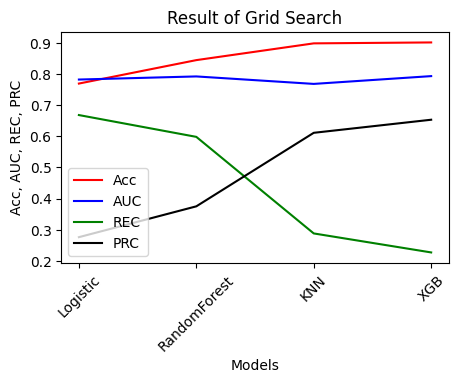

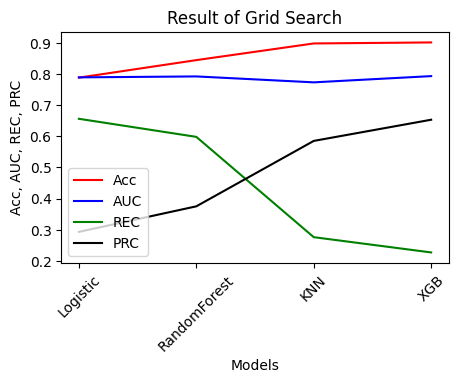

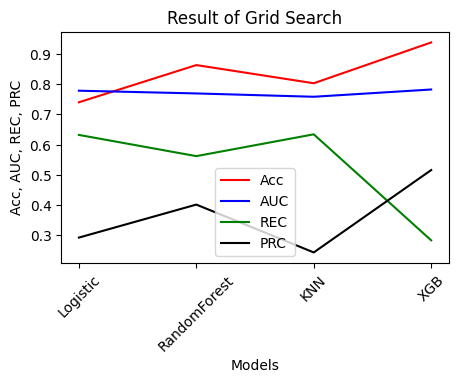

In [14]:
plt.rcParams["figure.figsize"] = (5, 3)
plot_results(result_acc1,result_auc1,result_rec1,result_prc1)
plot_results(result_acc2,result_auc2,result_rec2,result_prc2)
plot_results(result_acc3,result_auc3,result_rec3,result_prc3)

#### Best model 
Overall, it seems RF model is the best model which has high accuracy and AUR as well as relatively high recall. Also, sclaing and balancing didn't provide much significant improvement on the model performance. As a a result, it is suggested to use RF model trained on unbalanced and unscaled train set. 

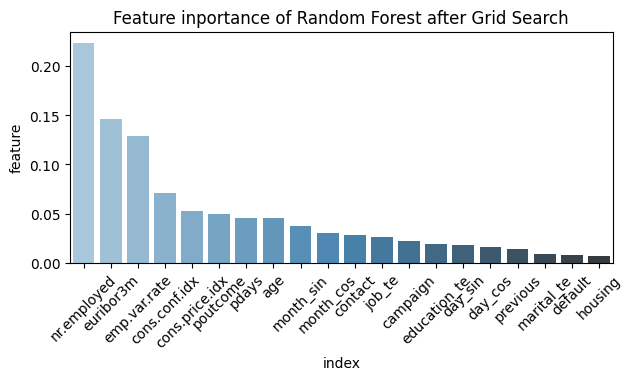

In [4]:
''' Build bar plot of feature importance of the best model '''
# save the best model
filename = './rf_model.sav'
# pickle.dump(models1[1]['rf'], open(filename, 'wb'))

# load the model from disk
rf_model = pickle.load(open(filename, 'rb'))

plt.rcParams["figure.figsize"] = (7, 3)
plot_feature_importance(rf_model, X_train)

Logistic: f1=0.461 auc=0.446


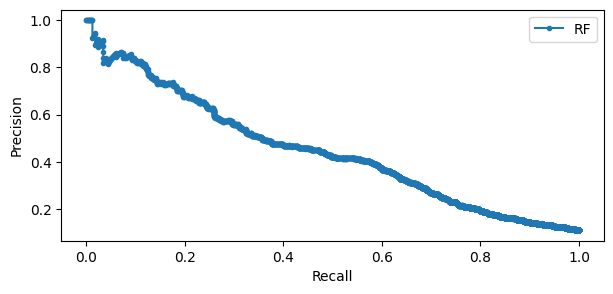

In [7]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, f1_score

# predict probabilities
lr_probs = rf_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = rf_model.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
plt.plot(lr_recall, lr_precision, marker='.', label='RF')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

[0.35009466 0.1169061 ]


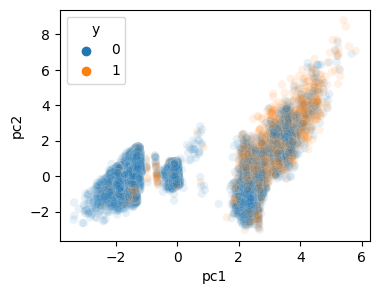

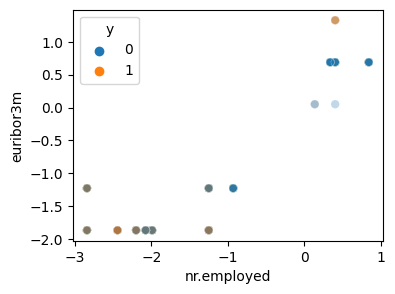

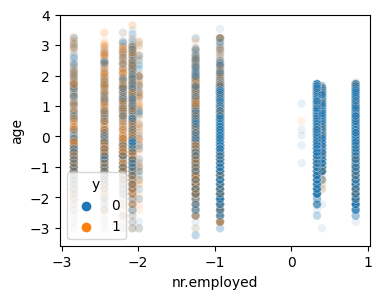

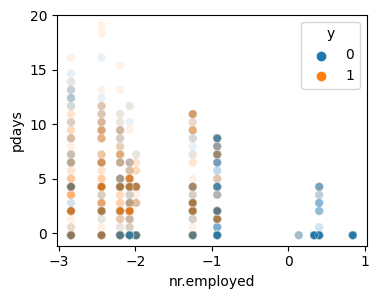

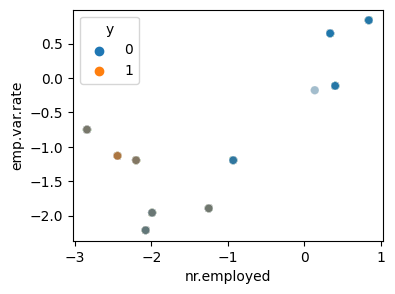

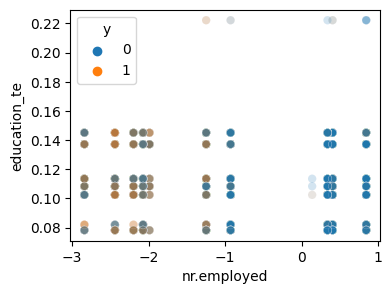

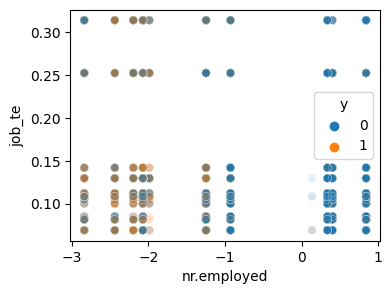

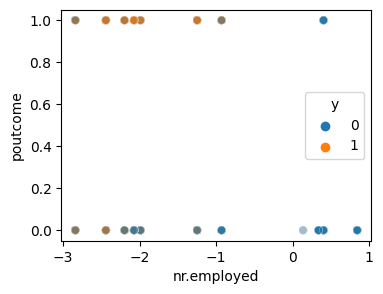

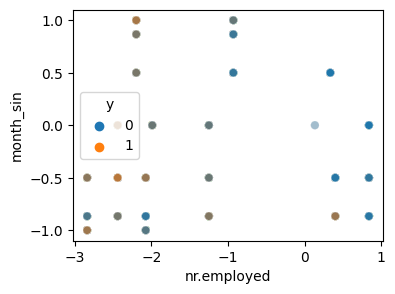

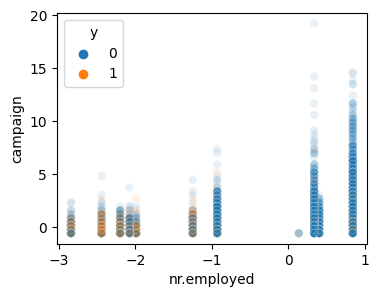

In [6]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
pcs = pca.fit_transform(X_train_scaled)
print(pca.explained_variance_ratio_)

principalDf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])

principalDf = principalDf.join(X_train_scaled).join(y_train)

xy = [('pc1', 'pc2'),
      ('nr.employed', 'euribor3m'),
      ('nr.employed', 'age'),
      ('nr.employed', 'pdays'),
      ('nr.employed', 'emp.var.rate'),
      ('nr.employed', 'education_te'),
      ('nr.employed', 'job_te'),
      ('nr.employed', 'poutcome'),
      ('nr.employed', 'month_sin'),
      ('nr.employed', 'campaign')]
for x, y in xy:
      fig, ax = plt.subplots(figsize=(4,3))
      sns.scatterplot(principalDf, x = x, y =y, hue='y', alpha=0.1, ax=ax)
      plt.show()

In [67]:
feature_pc_weight_df = pd.DataFrame()
feature_pc_weight_df['Feautre'] = X_train_scaled.columns
feature_pc_weight_df['Weight PC1'] = pca.components_[0]
feature_pc_weight_df['Weight PC2'] = pca.components_[1]
feature_pc_weight_df


,Feautre,Weight PC1,Weight PC2
0,age,-0.024659,0.479659
1,emp.var.rate,-0.512919,0.029217
2,cons.conf.idx,0.107167,-0.700949
3,euribor3m,-0.503587,0.036152
4,nr.employed,-0.484421,-0.066313
5,campaign,-0.104435,-0.132492
6,pdays,0.169109,0.425203
7,cons.price.idx,-0.400138,-0.016922
8,default,0.045853,-0.017637
9,housing,0.019010,-0.009968


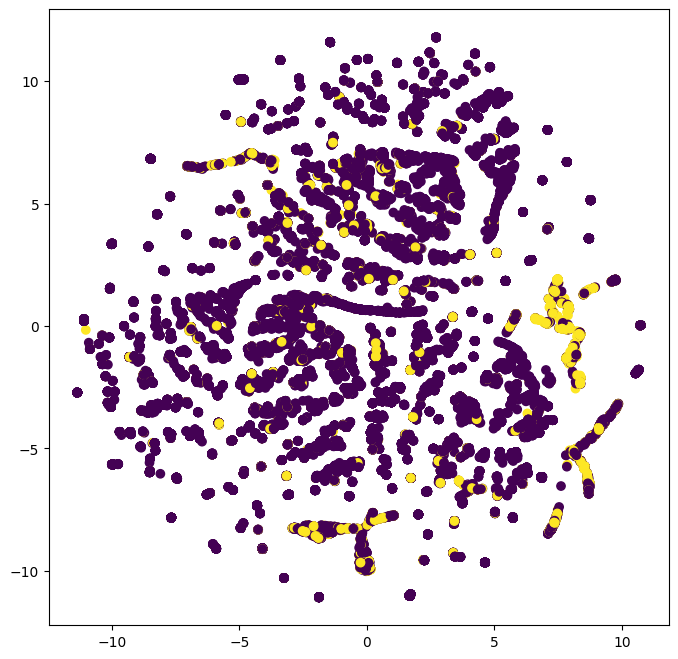

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_data = tsne.fit_transform(X_train)

plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_train.values)
plt.show()

# Deploy

In [1]:
# !pip3 freeze > requirements.txt 

In [134]:
import requests


input_json = {'age': 3.4657359027997265,
                'emp.var.rate': 1.4,
                'cons.conf.idx': 42.7,
                'euribor3m': 4.0,
                'nr.employed': 8.561803202334707,
                'campaign': 16.0,
                'pdays': 0.0,
                'cons.price.idx': 4.542422061134141,
                'default': 1.0,
                'housing': 0.0,
                'loan': 0.0,
                'contact': 1.0,
                'previous': 0.0,
                'poutcome': 0.0,
                'marital_te': 0.10323140316634136,
                'education_te': 0.13720815521210128,
                'job_te': 0.08516483516483517,
                'month_sin': -0.5000000000000001,
                'month_cos': -0.8660254037844386,
                'day_sin': -0.9749279121818235,
                'day_cos': -0.2225209339563146}


url = 'http://localhost:8080/predict'
response = requests.post(url,json=input_json)

print(response.json())


{'result': '0'}
